In [3]:
cd C:\Users\dabir\OneDrive - Iowa State University\Desktop\BCB546

C:\Users\dabir\OneDrive - Iowa State University\Desktop\BCB546


In [4]:
ls


 Volume in drive C is Windows
 Volume Serial Number is AC5D-F0D5

 Directory of C:\Users\dabir\OneDrive - Iowa State University\Desktop\BCB546

05/04/2025  07:39 PM    <DIR>          .
04/02/2025  01:25 PM    <DIR>          ..
02/05/2024  01:11 PM        11,203,933 Book1.xlsx
02/15/2024  01:45 AM         2,492,443 Dark.pdf
04/01/2024  04:45 PM            19,369 DATA MANAGEMENT PLAN.docx
04/12/2024  01:04 PM           141,207 DATA MANAGEMENT PLAN.pdf
03/10/2024  11:17 AM           213,807 dkx379.pdf
01/18/2024  04:10 PM            60,308 EEOB_BCB 546 Schedule - Spring 2024 - Sheet1.pdf
02/15/2024  01:45 AM           100,194 git-cheat-sheet-education.pdf
05/04/2025  07:39 PM            14,931 penguins_cytb.fasta
05/04/2025  07:38 PM               318 penguins_mass.csv
05/04/2025  07:38 PM             3,294 README (1).md
03/10/2024  11:13 AM           992,361 s12866-021-02270-7.pdf
01/16/2024  10:06 PM            86,168 Unix_Exercise_1.pdf
01/18/2024  04:11 PM         2,387,134 Week1_Lect

In [8]:
pip install biopython

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [10]:
import pandas as pd
from Bio import SeqIO
from Bio.Data import CodonTable
import pandas as pd

In [12]:
penguins_df = pd.read_csv("penguins_mass.csv") 
species_list = list(penguins_df.species)
penguins_df = pd.read_csv("penguins_mass.csv")

In [13]:
species_list = list(penguins_df.species)
with open('penguins_cytb.fasta', 'r') as file:
    content = file.read()

In [14]:
def get_sequences_from_file(fasta_fn):
    """
    #Reads sequences from a FASTA file and returns them in a dictionary.

    Parameters:
    - fasta_fn (str): The filename of the FASTA file containing the sequences.

    Returns:
    - dict: A dictionary where keys are species names and values are corresponding sequences.
    """
    sequence_data_dict = {}
    for record in SeqIO.parse(fasta_fn, "fasta"):
        description = record.description.split()
        species_name = description[1] + " " + description[2]
        sequence_data_dict[species_name] = record.seq
    return sequence_data_dict
cytb_seqs = get_sequences_from_file("penguins_cytb.fasta") 


In [15]:
penguins_df = pd.read_csv("penguins_mass.csv") 
species_list = list(penguins_df.species)
sequences_dict = get_sequences_from_file("penguins_cytb.fasta")
from Bio.Data import CodonTable

In [16]:
def translate_function(string_nucleotides):
    """
    Translates a DNA sequence into an amino acid sequence.

    Parameters:
    - string_nucleotides (str): The DNA sequence to be translated.

    Returns:
    - str: The translated amino acid sequence.
    """
    mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"]
    aa_seq_string = ""
    
    for i in range(0, len(string_nucleotides) - 2, 3):
        codon = string_nucleotides[i:i+3]
        if codon in mito_table.stop_codons:
            break
        aa = mito_table.forward_table[codon]
        aa_seq_string += aa
    
    return aa_seq_string

In [17]:
from Bio.Seq import Seq

In [18]:
def translate_function(string_nucleotides):
    # Create a BioPython Seq object from the input string
    seq = Seq(string_nucleotides)
    
    # Translate the sequence using the standard genetic code
    aa_seq = seq.translate()
    
    # Convert the translated sequence to a string
    aa_seq_string = str(aa_seq)
    
    return aa_seq_string


In [19]:
from Bio.SeqUtils.ProtParam import ProteinAnalysis

def compute_molecular_weight(aa_seq):
    # Create a ProteinAnalysis object from the amino acid sequence
    protein_analysis = ProteinAnalysis(aa_seq)
    
    # Calculate the molecular weight using the ProteinAnalysis object
    molecular_weight = protein_analysis.molecular_weight()
    return molecular_weight


In [20]:
def calculate_gc_content(dna_seq):
    # Count the occurrences of 'G' and 'C' in the DNA sequence
    gc_count = dna_seq.count('G') + dna_seq.count('C')
    
    # Calculate the total number of nucleotides in the sequence
    total_nucleotides = len(dna_seq)
    
    # Calculate the GC-content as the ratio of (G + C) / total nucleotides
    gc_content = gc_count / total_nucleotides
    
    return gc_content


In [21]:
import pandas as pd
from Bio.SeqUtils import gc_fraction
from Bio.SeqUtils.ProtParam import ProteinAnalysis

# Function to calculate molecular weight for each amino acid sequence


In [22]:
def calculate_molecular_weight(aa_seq):
    if aa_seq:
        return ProteinAnalysis(str(aa_seq)).molecular_weight()
    else:
        return float('NaN')  # Return NaN if the sequence is empty


In [23]:
def calculate_gc_content(dna_seq):
    if dna_seq:
        return GC(dna_seq)
    else:
        return float('NaN')  # Return NaN if the sequence is empty
penguins_df['molecular_weight'] = float('NaN')
penguins_df['GC_content'] = float('NaN')
penguins_df


,species,mass,molecular_weight,GC_content
0,Aptenodytes forsteri,28.00,NaN,NaN
1,Aptenodytes patagonicus,13.40,NaN,NaN
2,Eudyptes chrysocome,2.80,NaN,NaN
3,Eudyptes chrysolophus,4.50,NaN,NaN
4,Eudyptes sclateri,4.25,NaN,NaN
5,Eudyptula minor,1.60,NaN,NaN
6,Pygoscelis adeliae,4.60,NaN,NaN
7,Pygoscelis antarctica,4.10,NaN,NaN
8,Pygoscelis papua,6.10,NaN,NaN
9,Spheniscus demersus,3.20,NaN,NaN


In [24]:
from Bio.SeqUtils import gc_fraction

def calculate_gc_content(dna_seq):
    if dna_seq:
        return gc_fraction(dna_seq) * 100  # Convert fraction to percentage
    else:
        return float('NaN')  # Handle missing values



In [25]:
from Bio.SeqUtils import gc_fraction

for index, row in penguins_df.iterrows():
    species = row['species']
    if species in cytb_seqs:
        # Calculate molecular weight for the amino acid sequence
        aa_seq = cytb_seqs[species]
        molecular_weight = calculate_molecular_weight(aa_seq)
        penguins_df.at[index, 'molecular_weight'] = molecular_weight
        
        # Calculate GC content for the DNA sequence
        dna_seq = cytb_seqs[species]
        gc_content = gc_fraction(dna_seq) * 100  # Convert fraction to percentage
        penguins_df.at[index, 'GC_content'] = gc_content

penguins_df


,species,mass,molecular_weight,GC_content
0,Aptenodytes forsteri,28.00,100706.2480,48.381452
1,Aptenodytes patagonicus,13.40,100610.4134,49.693788
2,Eudyptes chrysocome,2.80,100947.4416,51.181102
3,Eudyptes chrysolophus,4.50,100909.1934,50.918635
4,Eudyptes sclateri,4.25,101003.5480,50.831146
5,Eudyptula minor,1.60,101031.1084,49.256343
6,Pygoscelis adeliae,4.60,100746.2704,49.081365
7,Pygoscelis antarctica,4.10,100311.3870,47.769029
8,Pygoscelis papua,6.10,100771.9904,47.156605
9,Spheniscus demersus,3.20,100874.6150,48.293963


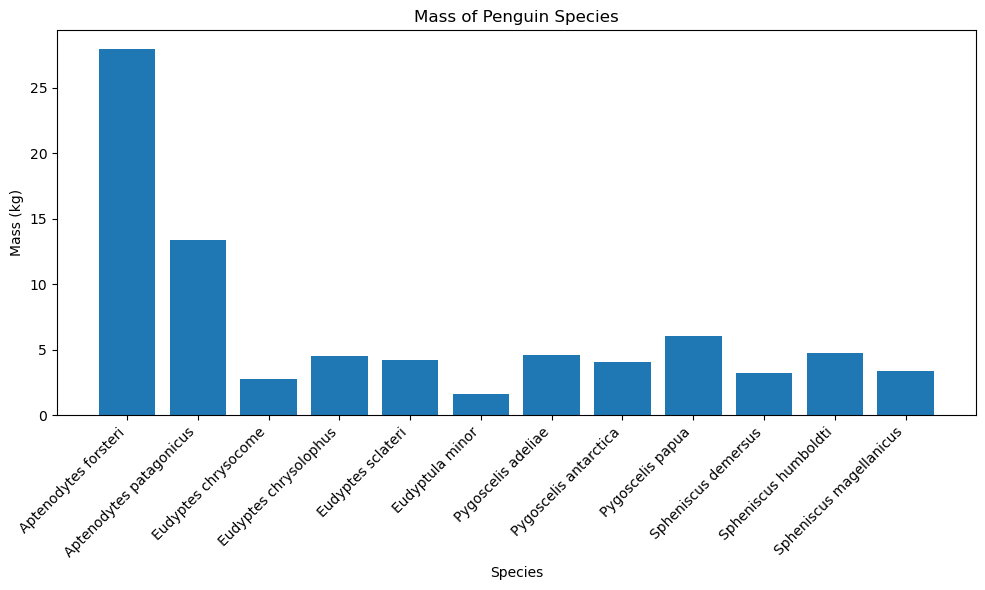

In [26]:
cytb_seqs

import matplotlib.pyplot as plt

# Plotting bar chart of mass with species names on the x-axis
plt.figure(figsize=(10, 6))
plt.bar(penguins_df['species'], penguins_df['mass'])
plt.xlabel('Species')
plt.ylabel('Mass (kg)')
plt.title('Mass of Penguin Species')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



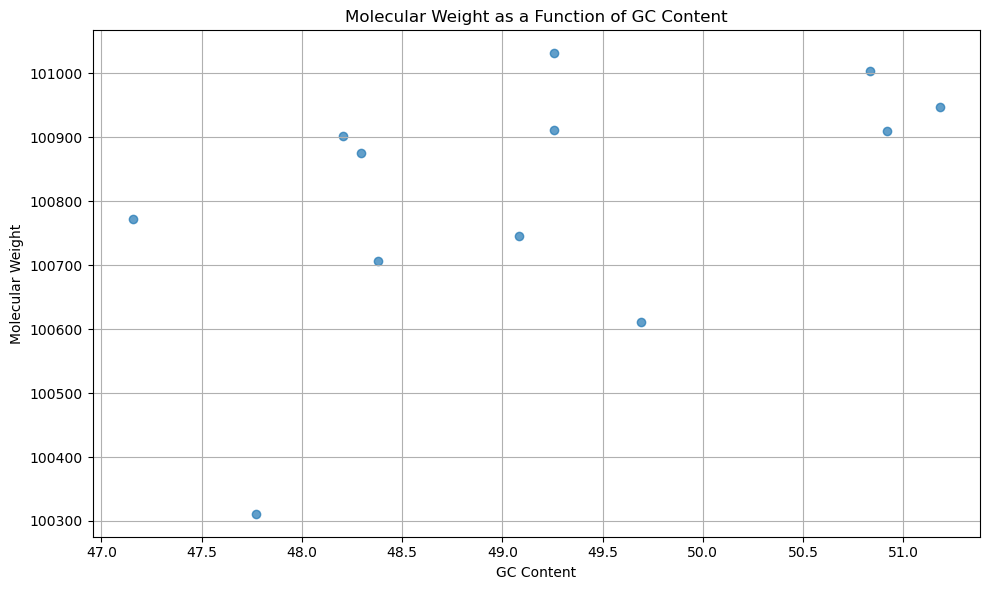

In [27]:
import matplotlib.pyplot as plt

# Plotting molecular weight as a function of GC-content
plt.figure(figsize=(10, 6))
plt.scatter(penguins_df['GC_content'], penguins_df['molecular_weight'], alpha=0.7)
plt.xlabel('GC Content')
plt.ylabel('Molecular Weight')
plt.title('Molecular Weight as a Function of GC Content')
plt.grid(True)
plt.tight_layout()
plt.show()


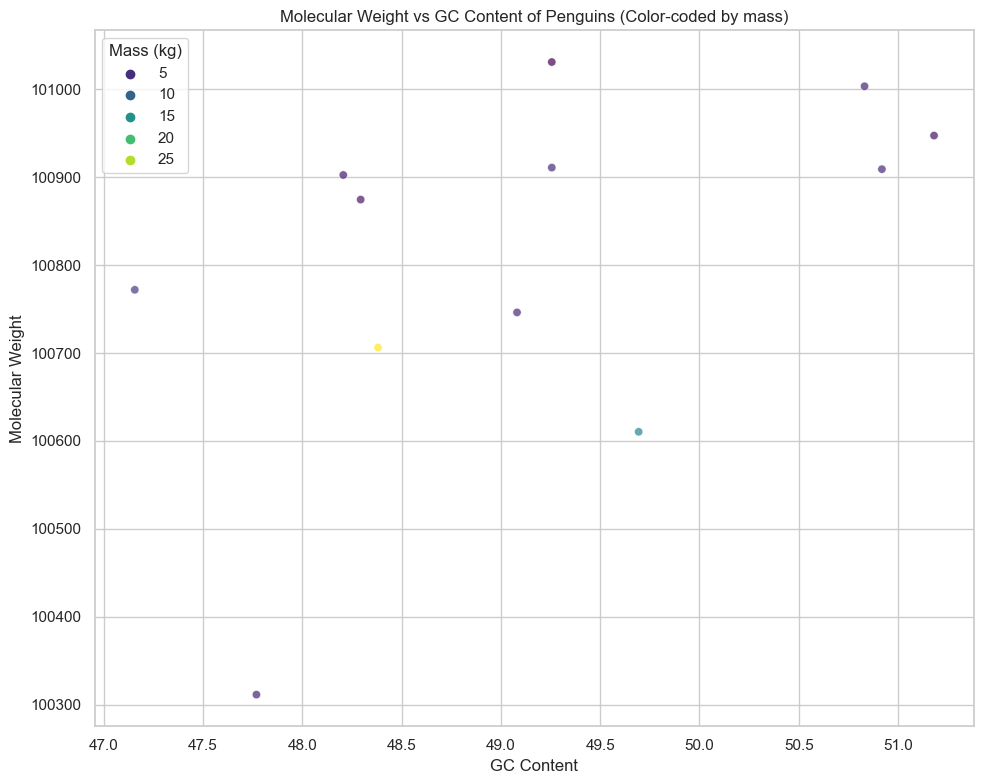

In [28]:
# Save the DataFrame to a CSV file
penguins_df.to_csv("penguins_mass_cytb.csv", index=False)

import matplotlib.pyplot as plt
import seaborn as sns

# Set up the seaborn style
sns.set(style="whitegrid")

# Create a scatter plot with molecular weight vs GC content, color-coded by mass
plt.figure(figsize=(10, 8))
sns.scatterplot(data=penguins_df, x='GC_content', y='molecular_weight', hue='mass', palette='viridis', alpha=0.7)
plt.xlabel('GC Content')
plt.ylabel('Molecular Weight')
plt.title('Molecular Weight vs GC Content of Penguins (Color-coded by mass)')
plt.legend(title='Mass (kg)')
plt.tight_layout()
plt.show()
    

In [29]:
!git init 

Initialized empty Git repository in C:/Users/dabir/OneDrive - Iowa State University/Desktop/BCB546/.git/


In [31]:
!git remote https://github.com/ddabiri/BCB546-PythonHW_Spring2024.git

error: unknown subcommand: `https://github.com/ddabiri/BCB546-PythonHW_Spring2024.git'
usage: git remote [-v | --verbose]
   or: git remote add [-t <branch>] [-m <master>] [-f] [--tags | --no-tags] [--mirror=<fetch|push>] <name> <url>
   or: git remote rename [--[no-]progress] <old> <new>
   or: git remote remove <name>
   or: git remote set-head <name> (-a | --auto | -d | --delete | <branch>)
   or: git remote [-v | --verbose] show [-n] <name>
   or: git remote prune [-n | --dry-run] <name>
   or: git remote [-v | --verbose] update [-p | --prune] [(<group> | <remote>)...]
   or: git remote set-branches [--add] <name> <branch>...
   or: git remote get-url [--push] [--all] <name>
   or: git remote set-url [--push] <name> <newurl> [<oldurl>]
   or: git remote set-url --add <name> <newurl>
   or: git remote set-url --delete <name> <url>

    -v, --verbose         be verbose; must be placed before a subcommand



In [33]:
!git remote add origin https://github.com/ddabiri/BCB546-PythonHW_Spring2024.git

In [34]:
!git add .

In [35]:
!git commit -m "Python_Assignment"

[master (root-commit) 8788f09] Python_Assignment
 16 files changed, 5499 insertions(+)
 create mode 100644 Book1.xlsx
 create mode 100644 DATA MANAGEMENT PLAN.docx
 create mode 100644 DATA MANAGEMENT PLAN.pdf
 create mode 100644 Dark.pdf
 create mode 100644 EEOB_BCB 546 Schedule - Spring 2024 - Sheet1.pdf
 create mode 100644 README (1).md
 create mode 100644 Unix_Exercise_1.pdf
 create mode 100644 Week1_Lecture1.pdf
 create mode 100644 dkx379.pdf
 create mode 100644 git-cheat-sheet-education.pdf
 create mode 100644 penguins_cytb.fasta
 create mode 100644 penguins_mass.csv
 create mode 100644 penguins_mass_cytb.csv
 create mode 100644 s12866-021-02270-7.pdf
 create mode 100644 ~$Book1.xlsx
 create mode 100644 ~$TA MANAGEMENT PLAN.docx


In [39]:
!git push origin master

To https://github.com/ddabiri/BCB546-PythonHW_Spring2024.git
 ! [rejected]        master -> master (fetch first)
error: failed to push some refs to 'https://github.com/ddabiri/BCB546-PythonHW_Spring2024.git'
hint: Updates were rejected because the remote contains work that you do not
hint: have locally. This is usually caused by another repository pushing to
hint: the same ref. If you want to integrate the remote changes, use
hint: 'git pull' before pushing again.
hint: See the 'Note about fast-forwards' in 'git push --help' for details.


In [38]:
import subprocess

# Generate SSH key
subprocess.run(["ssh-keygen", "-t", "ed25519", "-C", "ddabiri@iastate.edu"], input="\n\n", text=True)

# Display public key (copy this to GitHub)
with open(f"{subprocess.os.path.expanduser('~')}/.ssh/id_ed25519.pub", "r") as f:
    print("Add this to GitHub SSH Keys:\n", f.read())

Add this to GitHub SSH Keys:
 ssh-ed25519 AAAAC3NzaC1lZDI1NTE5AAAAIOHjiSLMB6CFWcmqAWwPn9wyRJWwA58sbitXnfZJY9BC ddabiri@iastate.edu



In [40]:
!git pull origin master

From https://github.com/ddabiri/BCB546-PythonHW_Spring2024
 * branch            master     -> FETCH_HEAD
 * [new branch]      master     -> origin/master
fatal: refusing to merge unrelated histories
